In [3]:
#MNIST DATASET Download link
#https://www.kaggle.com/c/digit-recognizer/data?select=train.csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

#reading mnist train dataset
mnist_train = pd.read_csv('train_mnist.csv')

In [8]:
mnist_train.shape

(42000, 785)

In [4]:
#print first 5 rows of dataset
print(mnist_train.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [5]:
#saving the lables column into new variable
mnist_label = mnist_train['label']

In [6]:
#now drop label column from original mnist_train dataset and store result in new dataframe
pixel_data = mnist_train.drop('label',axis=1)

In [7]:
#observer in initial dataframe we had 785 columns & now we have dropped label column we have 784 column
pixel_data.shape

(42000, 784)

In [9]:
mnist_label.shape

(42000,)

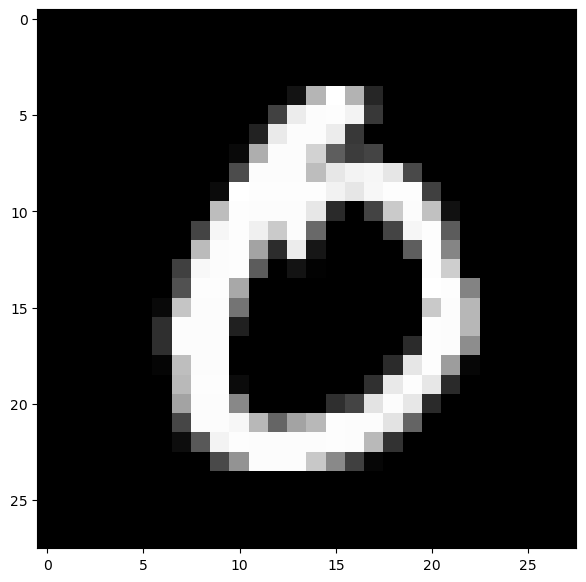

0


In [10]:
#display a number and plot it
plt.figure(figsize=(7,7))
index = 200
#so basically we are gonna check what number is at index 100 ie, 100th row
#extracting 100th row
grid_data = pixel_data.iloc[index].to_numpy().reshape(28,28)
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(mnist_label[index])

### Visualizing data using Pincipal Component Analysis(PCA):

    1.Computing Eigen vlaues and vectors explicitly
    2.Using scikit-learn library

In [11]:
#Pick first 15000 data-points to work on, for time-efficiency.
labels = mnist_label.head(15000)
data = pixel_data.head(15000)

In [12]:
print('Shape of data : ',data.shape)
print('Shape of labels : ',labels.shape)

Shape of data :  (15000, 784)
Shape of labels :  (15000,)


In [13]:
#Step 1 - Data preprocessing: Standardizing data, mean=0, Var=1

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [14]:
#Step 2 - Find the covariance matrix 
#copying standardized_data into new variable called sample_data
sample_data = standardized_data
print("Shape of sample data matrix is: ",sample_data.shape)
covar_matrix = np.matmul(sample_data.T, sample_data)
print("Shape of Covariance matrix is: ",covar_matrix.shape)

Shape of sample data matrix is:  (15000, 784)
Shape of Covariance matrix is:  (784, 784)


In [15]:
#Step 3 - Find the top two eigen values and corresponding vectors for projecting onto a 2-dimensional space
from scipy.linalg import eigh
values, vectors = eigh(covar_matrix, eigvals=(782,783))
print("Shape of Eigen vectors : ",vectors.shape)
vectors = vectors.T
print("Shape of Eigen vectors : ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of Eigen vectors :  (784, 2)
Shape of Eigen vectors :  (2, 784)


In [16]:
# projecting the original data sample on the plane formed by two principal eigen vectors by vector-vector multiplication.

new_coordinates = np.matmul(vectors,sample_data.T)
print ("Resultanat new data points shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

Resultanat new data points shape  (2, 784) X (784, 15000)  =  (2, 15000)


In [17]:
# appending label to the 2d projected data
new_coord = np.vstack((new_coordinates, labels.T)).T
print("Shape of new_coordinates data matrix : ",new_coord.shape)

Shape of new_coordinates data matrix :  (15000, 3)


In [18]:
# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coord, columns=("1st principal","2nd principal","Labels"))
print(dataframe.columns)

Index(['1st principal', '2nd principal', 'Labels'], dtype='object')


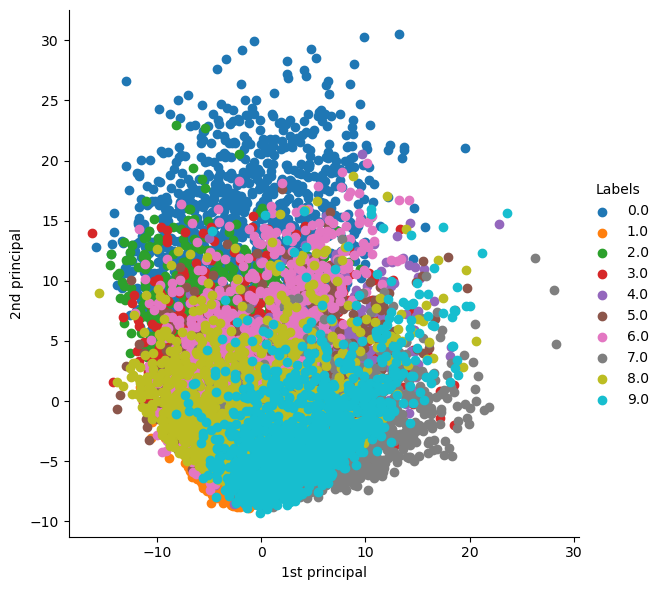

In [19]:
sn.FacetGrid(dataframe, hue="Labels", height=6).map(plt.scatter, '1st principal', '2nd principal').add_legend()
plt.show()

### PCA using Scikit-learn

In [20]:
#initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

In [34]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("Shape of pca_reduced.shape = ", pca_data.shape)

Shape of pca_reduced.shape =  (15000, 2)


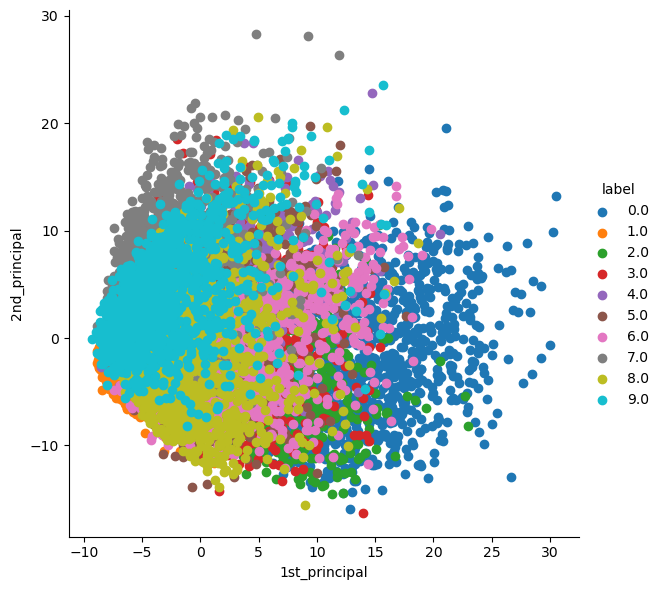

In [35]:
# attaching the label for each 2-d data point 
pca_Data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_Data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

### PCA for Dimensionality reduction (not for visualization)

You can do either PCA for Visualization where you mostly reduce d no of features to 1/2/3 dimension, or you do PCA for ML, modelling data and other use cases, where you might need to reduce d dimensions to d' such that d'< d. Eg. in MNIST dataset you might need to reduce 784 features to say 100, 200, 300, 80, 20, 50 any required number. Now question is how will you understand what number of fetures should ou reduce your data to? So universally, you need to reduce to no of features where your data's variance/information is retained at 90% or any required percent.

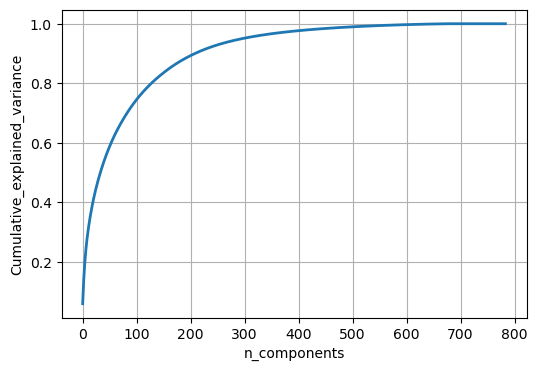

In [36]:
pca.n_components = 784 #preserving all 784 components
pca_datas = pca.fit_transform(sample_data)
#print(pca.explained_variance_)
percentage_variance_explainedORretained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_variance_explained = np.cumsum(percentage_variance_explainedORretained)

#plot the pca spectrum 
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_variance_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [37]:
#this graph tells to preserve 90% of variance explained you need atleast 200 components, and so on.

### MNIST Visualisation using t-SNE

In [38]:
#picking top 1000 data records for t-SNE
data = pixel_data.head(1000)
labels = mnist_label.head(1000)
print(data.shape,labels.shape)

(1000, 784) (1000,)


In [39]:
#Now Standarding data as part of data preprocessing 
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(1000, 784)


In [40]:
#Initialize the t-SNE Model
model = TSNE(n_components=2, random_state=0)

In [41]:
#Apply t-SNE to the data
tsne_data = model.fit_transform(standardized_data)

C:\Users\Rutika\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Rutika\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [42]:
# creating a new data frame which help us in ploting the result data
tsne_Data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_Data, columns=("Dim_1", "Dim_2", "label"))

C:\Users\Rutika\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


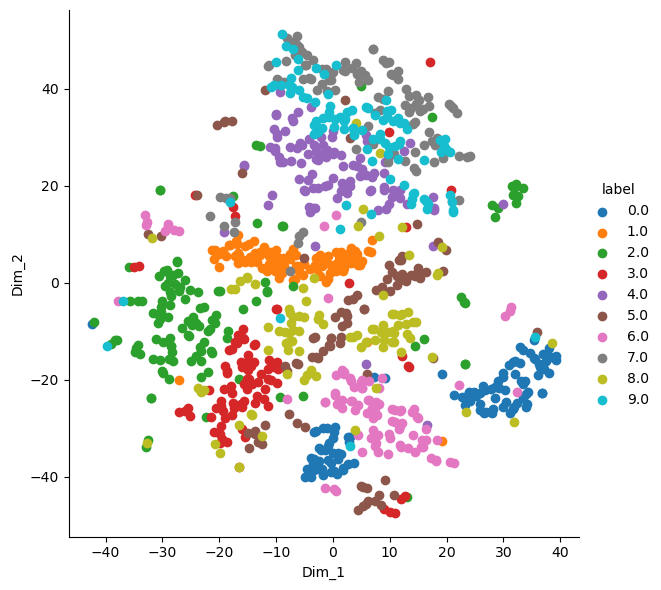

In [43]:
# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

C:\Users\Rutika\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Rutika\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Rutika\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


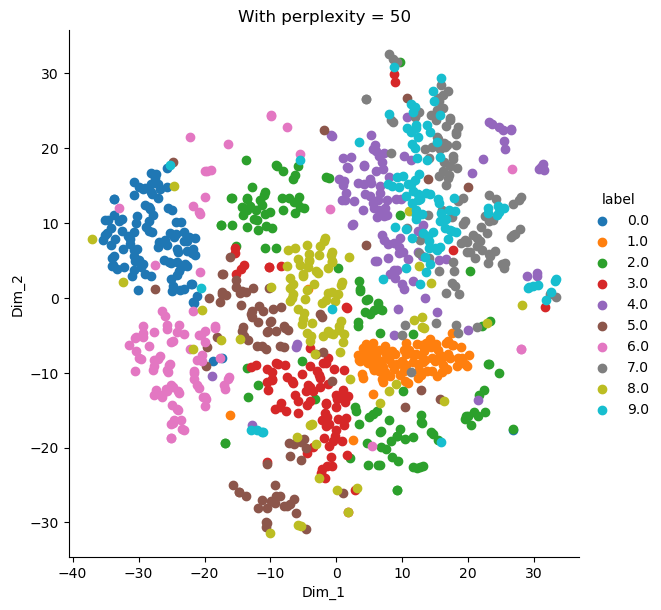

In [44]:
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(standardized_data) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

C:\Users\Rutika\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Rutika\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Rutika\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


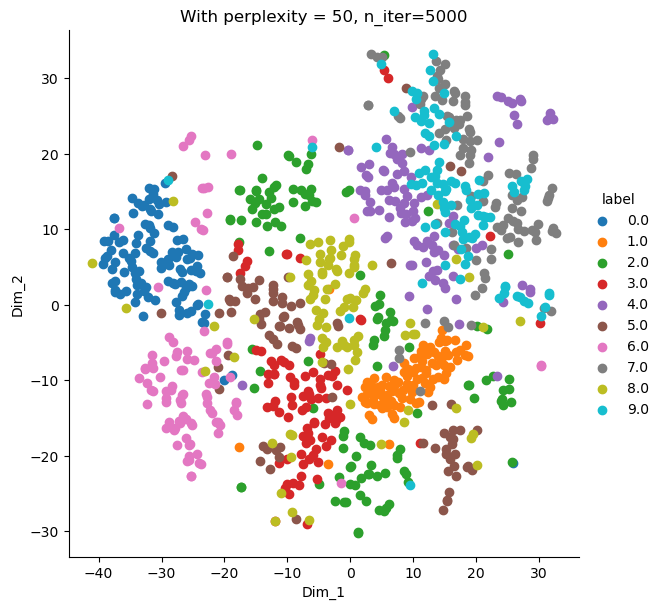

In [45]:
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsne_data = model.fit_transform(standardized_data) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()